# Chapter 3: Classification

In this chapter the code will deal with classification techniques in ML.

## MNIST

We will start off by using the MNIST dataset which is a combination of handwritten digits written by high school students and US Postal Service. This problem tries to recognize the handwritten digits.

### Get the data 

We will use sklearn's `fetch_mldata` function to get the MNIST dataset. All of sklearn's datasets have a dictionary containing the following things.
- Descr -- Description of the data
- data -- The actual data
- target -- The target variable


In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST Original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

### Plotting the digits

In this section we will try and plot a few of the digits to see what they actually look. The data is greyscale so it should be a black-white picture

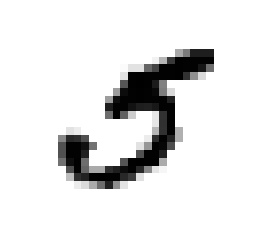

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

### Train Test split

The MNIST dataset is already split into training and testing. The first 60k are training data and the last 10k are testing data. We will get the train and test splits and also shuffle the training data so that our CV folds find all of the digits in each of the fold.

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Binary Predictor

Below we will try to make the problem simple by just trying to predict whether the digit is a 5 or not. This is a binary classification problem where the classifier only tries to predict if the digit is a 5 or not.

We will then calculate the accuracy of the model and identify the issue related to accuracy as a metric of goodness of fit in classification problems

In [10]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [25]:
test_prediction = sgd_clf.predict(X_test)
sum(test_prediction == y_test_5)/float(len(y_test_5))

0.97070000000000001

### Custom Crossvalidation

Sometimes we will want to find out a way to implement a custom cross validation function. We can do this easily using sklearn's inbuilt functions

In [55]:
from sklearn.base import clone
from sklearn.cross_validation import StratifiedKFold

skfolds = StratifiedKFold(y_train_5, n_folds = 3, random_state=42)
fold = 0

for train_index, test_index in skfolds:
    fold = fold + 1
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    predict = clone_clf.predict(X_test_fold)
    
    n_correct = sum(predict == y_test_fold)
    print "Accuracy for fold %s = %s" %(fold, n_correct/(1.0*len(y_test_fold)))

Accuracy for fold 1 = 0.87395
Accuracy for fold 2 = 0.93445
Accuracy for fold 3 = 0.96695


### Cross Validation

Here we will use sklearns cross_val_score function to calculate the cross validated accuracy score of each fold

In [56]:
from sklearn.cross_validation import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5, scoring = "accuracy")

array([ 0.9535872 ,  0.96191667,  0.95658333,  0.96483333,  0.96883074])

As we can see that the above prediction is at 96%. So it that a good predictor? Let us check the accuracy of a simple predictor that predicts that all of the values are not 5. 

In [50]:
not_5_predictor = False
n_correct = sum(not_5_predictor == y_test_5)
print "Accuracy is %s"%(n_correct/(1.0*len(y_test_5)))

Accuracy is 0.9108


As we can see that a simple classifier can acheive an accuracy of 91%. This makes sense as 10% of the data is 5 and the rest is not 5. This is a reason why accuracy is not used as a metric of goodness of fit.